
# Analyzing the Diabetes Prediction Dataset



# Project Overview

This project analyzes a dataset to understand and predict factors that contribute to diabetes. The dataset includes information about people's age, gender, body mass index (BMI), blood glucose levels, and more.


# Why is this Analysis Important?


By identifying patterns and relationships between these variables, we can develop better strategies for preventing and treating diabetes. Understanding risk factors like hypertension, BMI, and blood glucose levels can improve early detection and personalized healthcare.


# Who will Benefit from this Analysis?


This analysis will benefit:

- Healthcare professionals: to improve patient advice and education
- Researchers: to develop more accurate prediction models and guide future research
- Policy makers and public health experts: to design prevention and health promotion programs


**Original Data Source**: Kaggle - Diabetes Prediction Dataset


# Dataset Description


The original dataset comes from Kaggle's Diabetes Prediction Dataset. The variables include:

- Gender
- Age
- Heart disease history
- Smoking history
- BMI
- Blood glucose level
- Diabetes status

Preparing the Work Environment


Next, we'll prepare our work environment by importing necessary libraries and loading the data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [6]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
%matplotlib inline

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
# Load the dataset

df = pd.read_csv("diabetes_prediction_dataset.csv", delimiter = ',')
print(f"Observaciones : {df.shape[0]:,}")
print(f"Columnas      : {df.shape[1]}")

Observaciones : 100,000
Columnas      : 9


In [12]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [14]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [18]:
# Iterate through each column in the DataFrame
for col in df.columns:
    # Calculate and display the count of each value in the column
    print(f"**Column:** {col}")
    print(df[col].value_counts())
    print("\n")

**Column:** gender
gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64


**Column:** age
age
80.00    5621
51.00    1619
47.00    1574
48.00    1568
53.00    1542
         ... 
1.00       83
0.48       83
0.40       66
0.16       59
0.08       36
Name: count, Length: 102, dtype: int64


**Column:** hypertension
hypertension
0    92515
1     7485
Name: count, dtype: int64


**Column:** heart_disease
heart_disease
0    96058
1     3942
Name: count, dtype: int64


**Column:** smoking_history
smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


**Column:** bmi
bmi
27.32    25495
23.00      103
27.12      101
27.80      100
24.96      100
         ...  
54.29        1
55.18        1
53.41        1
11.75        1
12.77        1
Name: count, Length: 4247, dtype: int64


**Column:** HbA1c_level
HbA1c_level
6.6    8540
5.7    8413
6.5    8362
5.8    8

In [22]:
# Define a function to extract numerical and categorical columns separately
def get_num_cat_cols(df):
    """
    This function takes a DataFrame as input and returns two lists:
    - Numerical columns
    - Categorical columns
    """
    # Extract numerical columns
    num_cols = [x for x in df.columns if df[x].dtype != 'object']
    
    # Extract categorical columns
    cat_cols = [x for x in df.columns if x not in num_cols]
    
    # Print the extracted columns
    print(f'**Numerical Columns:**\n', num_cols)
    print(f'**Categorical Columns:**\n', cat_cols)
    
    # Return the extracted columns
    return num_cols, cat_cols

In [24]:
num_cols, cat_cols = get_num_cat_cols(df)

**Numerical Columns:**
 ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
**Categorical Columns:**
 ['gender', 'smoking_history']


Inference


Based on the data analysis, we infer that:


- Columns with values between 0 and 1 are considered nominal categorical variables.
- These columns will be added to the list of categorical columns (cat_cols).


In [27]:
# Move binary variables to categorical variables
cat_cols.extend(['hypertension', 'heart_disease', 'diabetes'])
print("**Updated Categorical Columns:**\n", cat_cols)

# Update numerical columns by removing binary variables
num_cols = [x for x in num_cols if x not in cat_cols]
print("**Updated Numerical Columns:**\n", num_cols)

**Updated Categorical Columns:**
 ['gender', 'smoking_history', 'hypertension', 'heart_disease', 'diabetes']
**Updated Numerical Columns:**
 ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']


Inference


Based on the updated column classification, we can infer that:


- We have a total of 5 categorical columns, which are:
    - hypertension
    - heart_disease
    - diabetes
    - (and 2 other categorical columns)
- We have a total of 4 numerical columns, which contain continuous or quantitative data.

This inference provides a clear understanding of the dataset's structure and column characteristics.

In [30]:
# Define a function to detect special characters in categorical columns
def detect_special_chars(cat_cols, df):
    """
    This function takes a list of categorical columns and a DataFrame as input.
    It prints the value counts for each categorical column, highlighting any special characters.
    """
    for c in cat_cols:
        print('-'*100)
        print(f'**Column Name:** {c}')
        print('-'*100)
        print(df[c].value_counts())

# Call the function
detect_special_chars(cat_cols, df)

----------------------------------------------------------------------------------------------------
**Column Name:** gender
----------------------------------------------------------------------------------------------------
gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
**Column Name:** smoking_history
----------------------------------------------------------------------------------------------------
smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
**Column Name:** hypertension
----------------------------------------------------------------------------------------------------
hypertension
0    92515
1     7485
Name: count, dtype: int

Analysis Result


After conducting the analysis, we found that:


- No special characters were detected in any of the categorical columns.
- No columns need to be removed from our DataFrame.

Our DataFrame is now clean and ready for further analysis and modeling.

In [33]:
# Analisis descriptivo
df[num_cols].describe().round(2)

,age,bmi,HbA1c_level,blood_glucose_level
count,100000.00,100000.00,100000.00,100000.00
mean,41.89,27.32,5.53,138.06
std,22.52,6.64,1.07,40.71
min,0.08,10.01,3.50,80.00
25%,24.00,23.63,4.80,100.00
50%,43.00,27.32,5.80,140.00
75%,60.00,29.58,6.20,159.00
max,80.00,95.69,9.00,300.00


Inferences from the Data


Based on the analysis, we can make the following inferences:


Age


- The average age is 41.89 years, with a median of 43 years.
- The age distribution is relatively balanced in the dataset.

Hypertension and Heart Disease


- Most individuals do not have hypertension or heart disease.
- The values for both columns are low.

Body Mass Index (BMI)


- The average BMI is 27.32, indicating a tendency towards overweight.

HbA1c Level and Blood Glucose Level


- The average values for both indicators are within normal ranges.

Diabetes


- Approximately 8% of individuals have diabetes in the dataset.
- Around 92% do not have diabetes.

These inferences provide valuable insights into the characteristics of the dataset and can inform further analysis and modeling.

In [38]:
#No hay valores nulos
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

<Axes: xlabel='diabetes', ylabel='age'>

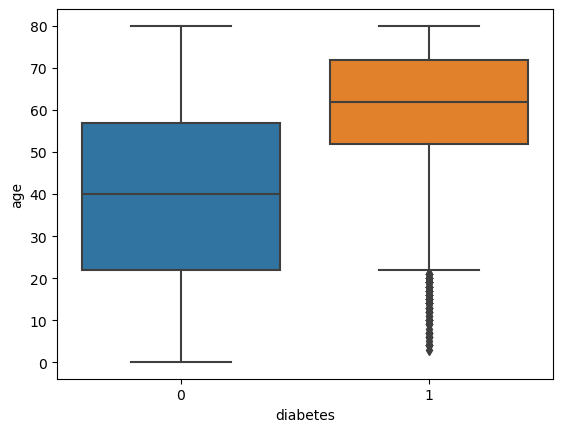

In [40]:
# Columna - age
sns.boxplot(x = df['diabetes'], y = df['age'])

<Axes: xlabel='age', ylabel='Count'>

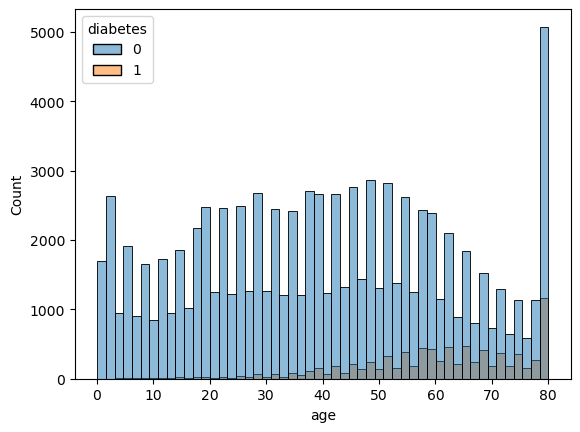

In [42]:
sns.histplot(x = df['age'], hue = df['diabetes'])

Inference: Age and Diabetes


Based on the analysis, we can make the following inference:


Age and Diabetes Relationship
- The average age of individuals with diabetes is higher than those without diabetes.
- The age range of individuals with diabetes is also wider than those without diabetes.


<Axes: xlabel='diabetes', ylabel='bmi'>

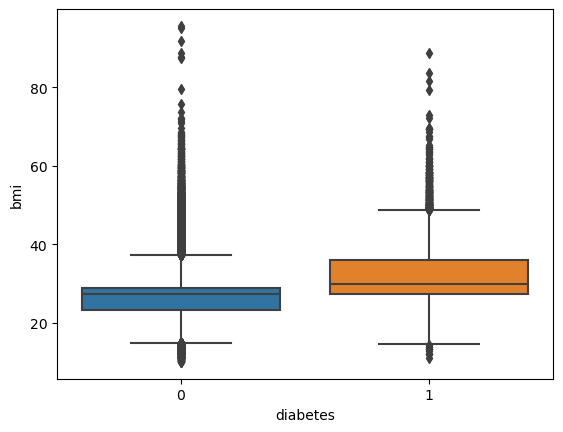

In [45]:
# Columna - bmi
sns.boxplot(x = df['diabetes'], y = df['bmi'])

<Axes: xlabel='bmi', ylabel='Count'>

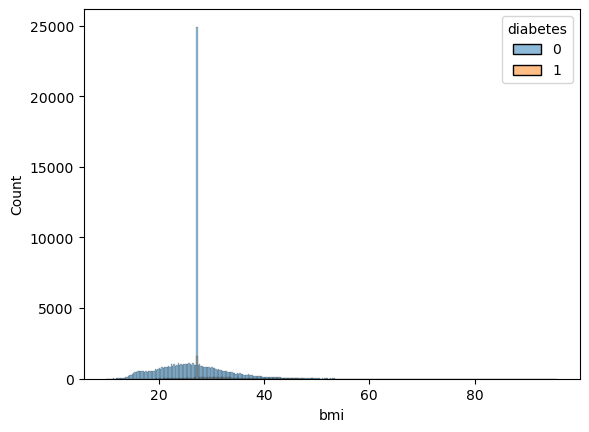

In [47]:
sns.histplot(x = df['bmi'], hue = df['diabetes'])

Inference: BMI and Diabetes


Based on the analysis, we can make the following inference:


BMI and Diabetes Relationship


- The average BMI of individuals with diabetes is similar to those without diabetes.
- However, the BMI range of individuals with diabetes is wider than those without diabetes.


<Axes: xlabel='diabetes', ylabel='HbA1c_level'>

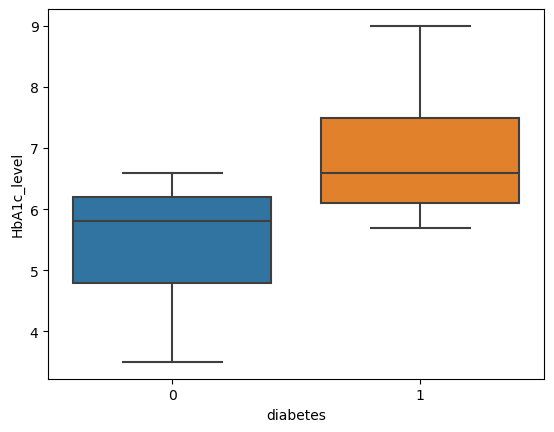

In [50]:
# Columna - HbA1c_level
sns.boxplot(x = df['diabetes'], y = df['HbA1c_level'])

Inference: HbA1c Level and Diabetes


Based on the analysis, we can make the following inference:


HbA1c Level and Diabetes Relationship


- The average HbA1c level of individuals with diabetes is significantly higher than those without diabetes.
- The range of HbA1c levels for individuals with diabetes is also wider than those without diabetes.

<Axes: xlabel='HbA1c_level', ylabel='Count'>

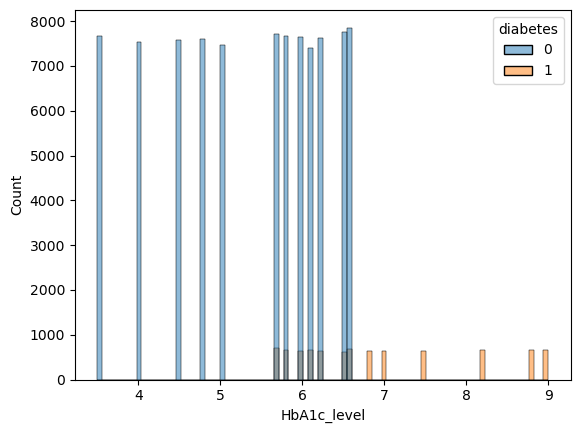

In [53]:
sns.histplot(x = df['HbA1c_level'], hue = df['diabetes'])

Inference: HbA1c Level in Individuals with Diabetes


Based on the analysis, we can make the following inference:


HbA1c Level in Diabetes Cases


- In all cases, individuals with diabetes have an HbA1c level above 5.

<Axes: xlabel='diabetes', ylabel='blood_glucose_level'>

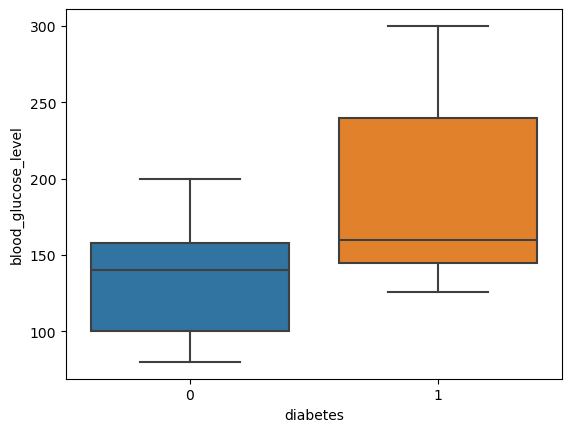

In [56]:
# Columna - blood_glucose_level
sns.boxplot(x = df['diabetes'], y = df['blood_glucose_level'])

Inference: HbA1c Level and Diabetes Relationship


Based on the analysis, we can make the following inference:


- The average HbA1c level of individuals with diabetes is significantly higher than those without diabetes.
- The range of HbA1c levels for individuals with diabetes is wider than those without diabetes.


<Axes: xlabel='blood_glucose_level', ylabel='Count'>

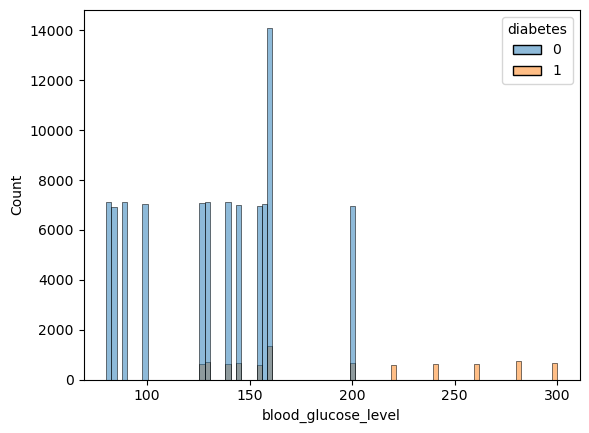

In [61]:
sns.histplot(x = df['blood_glucose_level'], hue = df['diabetes'])

In [63]:
# Función para realizar una prueba de chi-cuadrado entre una característica categórica y la característica objetivo.
def chi_sq_test(ct):
    # input crosstab of 2 categorical variables
    stat, p, dof, expected = chi2_contingency(ct)

    # interpret p-value
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Both variables are Dependent (reject H0)')
    else:
        print('Both variables are Independent (H0 holds true)')

In [65]:
# Función para trazar un gráfico de barras apiladas entre una característica categórica y la variable objetivo, que también nos ayuda a identificar la variable dependiente utilizando la función chi-cuadrado. Este paso es la selección de características.
def cat_col_test(df, cat_colname, target_colname):
    
    print(f"Column name - {cat_colname}")
    ct = pd.crosstab(df[cat_colname],df[target_colname])
    chi_sq_test(ct)
    ax = ct.plot(kind='bar',stacked=True, rot = 45)
    ax.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')

    for c in ax.containers:
        ax.bar_label(c, label_type='center')
    plt.show()

Column name - gender
p value is 7.953383718307459e-32
Both variables are Dependent (reject H0)


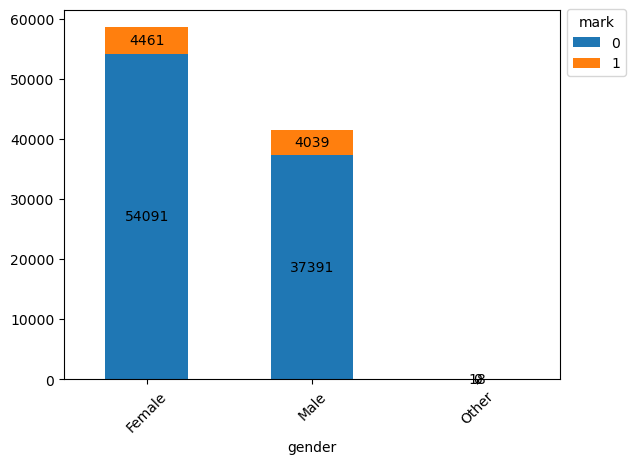

Column name - smoking_history
p value is 0.0
Both variables are Dependent (reject H0)


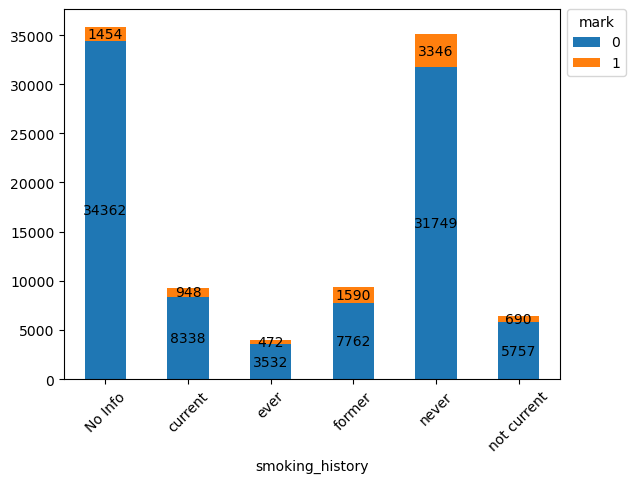

Column name - hypertension
p value is 0.0
Both variables are Dependent (reject H0)


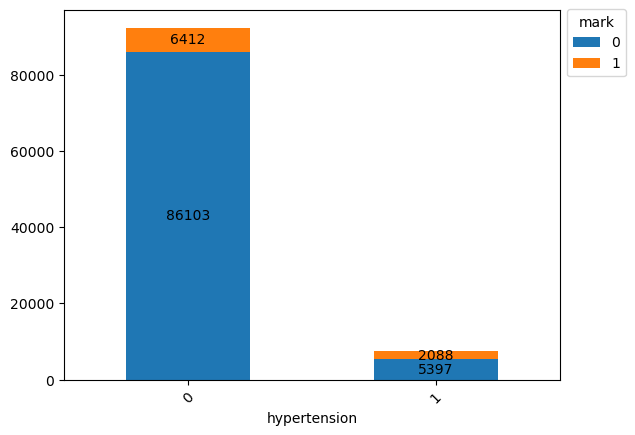

Column name - heart_disease
p value is 0.0
Both variables are Dependent (reject H0)


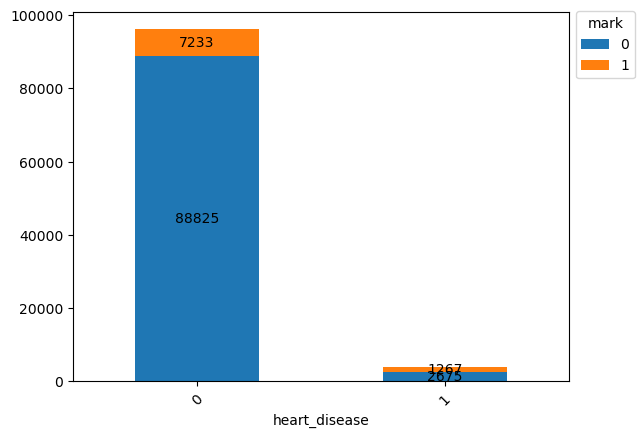

Column name - diabetes
p value is 0.0
Both variables are Dependent (reject H0)


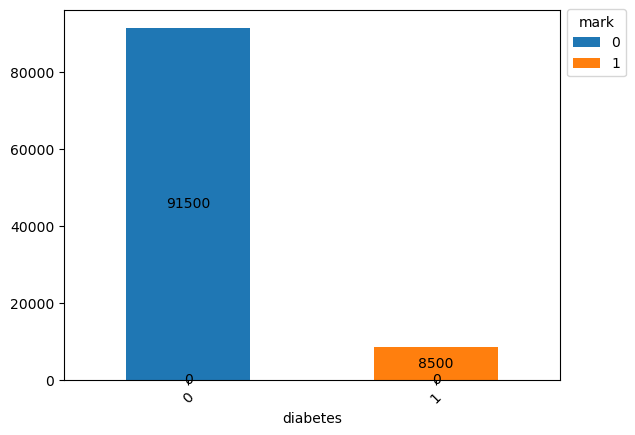

In [67]:
for c in cat_cols:
    cat_col_test(df, c, 'diabetes')

Inference


It is concluded that all the reviewed variables are dependent on the target variable, indicating a significant relationship between them. Therefore, the null hypothesis (H0) is rejected.


In [70]:
bins = [0, 29, 60, df['age'].max()]
labels = ['young', 'adult', 'elderly']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

In [72]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group
0,Female,80.0,0,1,never,25.19,6.6,140,0,elderly
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,adult
2,Male,28.0,0,0,never,27.32,5.7,158,0,young
3,Female,36.0,0,0,current,23.45,5.0,155,0,adult
4,Male,76.0,1,1,current,20.14,4.8,155,0,elderly


<Figure size 800x600 with 0 Axes>

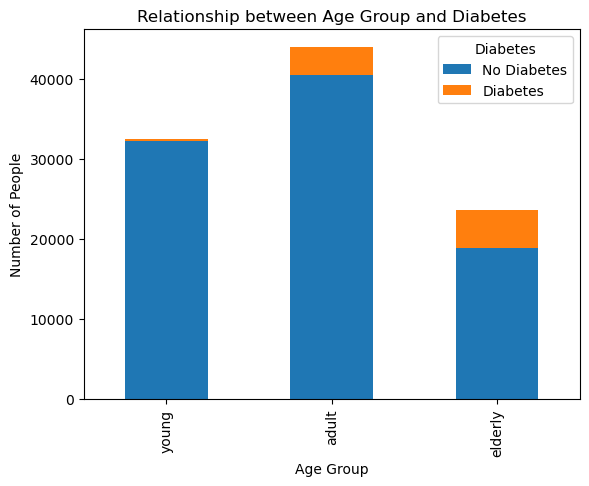

In [74]:
# Create a bar chart showing the relationship between age group and diabetes
plt.figure(figsize=(8, 6))
df.groupby(['age_group', 'diabetes']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Age Group')
plt.ylabel('Number of People')
plt.title('Relationship between Age Group and Diabetes')
plt.legend(title='Diabetes', labels=['No Diabetes', 'Diabetes'])
plt.show()

Inference


There is a higher number of people with diabetes in the adult and elderly age groups compared to the young age group.

In [77]:
#Transform our categorical columns
categorical_columns = ["gender", "smoking_history", "age_group"]
#Apply one-hot encoding to the categorical columns
df_dummies = pd.get_dummies(df, columns=categorical_columns)


In [79]:
df_dummies.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,age_group_young,age_group_adult,age_group_elderly
0,80.0,0,1,25.19,6.6,140,0,True,False,False,False,False,False,False,True,False,False,False,True
1,54.0,0,0,27.32,6.6,80,0,True,False,False,True,False,False,False,False,False,False,True,False
2,28.0,0,0,27.32,5.7,158,0,False,True,False,False,False,False,False,True,False,True,False,False
3,36.0,0,0,23.45,5.0,155,0,True,False,False,False,True,False,False,False,False,False,True,False
4,76.0,1,1,20.14,4.8,155,0,False,True,False,False,True,False,False,False,False,False,False,True


In [85]:

#Calculate the correlation matrix
correlation_matrix = df_dummies.corr()

#Display the correlation matrix
print(correlation_matrix)

                                  age  hypertension  heart_disease       bmi  \
age                          1.000000      0.251171       0.233354  0.337396   
hypertension                 0.251171      1.000000       0.121262  0.147666   
heart_disease                0.233354      0.121262       1.000000  0.061198   
bmi                          0.337396      0.147666       0.061198  1.000000   
HbA1c_level                  0.101354      0.080939       0.067589  0.082997   
blood_glucose_level          0.110672      0.084429       0.070066  0.091261   
diabetes                     0.258008      0.197823       0.171727  0.214357   
gender_Female                0.030480     -0.014318      -0.077832  0.023016   
gender_Male                 -0.030282      0.014423       0.077911 -0.023021   
gender_Other                -0.007348     -0.003816      -0.002718  0.000119   
smoking_history_No Info     -0.276945     -0.117210      -0.052398 -0.222553   
smoking_history_current      0.030946   

In [87]:
#Remove the age group columns from the DataFrame df_dummies
df_dummies = df_dummies.drop(["age_group_young", "age_group_adult", "age_group_elderly"], axis=1)

Inference: 
- The age groups are eliminated due to their high correlation with the rest of the variables.

In [92]:
df_dummies.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,True,False,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,0,True,False,False,True,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,False,True,False,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,True,False,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,False,True,False,False,True,False,False,False,False


In [98]:
df_dummies_sin_outliers = df_dummies


#Define a function to remove outliers based on IQR
def remove_outliers_iqr(df_dummies_sin_outliers, column_name):
    Q1 = df_dummies_sin_outliers[column_name].quantile(0.25)
    Q3 = df_dummies_sin_outliers[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df_dummies_sin_outliers[(df_dummies_sin_outliers[column_name] >= lower_bound) & (df_dummies_sin_outliers[column_name] <= upper_bound)]


#List of columns where you want to remove outliers
columns_to_remove_outliers = ['bmi']


#Remove outliers in the selected columns
for column in columns_to_remove_outliers:
    data_sin_outliers = remove_outliers_iqr(df_dummies_sin_outliers, column)

Inference: 
- We have the outlier-free dataframe 'data_sin_outliers' and the dataframe with outliers 'df_dummies'.

In [ ]:
#Save the DataFrames as a CSV file
data_sin_outliers.to_csv('data_sin_outliers.csv', index=False)
df_dummies.to_csv('df_dummies.csv', index=False)